In [1]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [2]:
import numpy as np
import pandas as pd

In [3]:
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [10]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func, inspect

In [11]:
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [12]:
# reflect an existing database into a new model
Base = automap_base()
# reflect the tables
Base.prepare(engine, reflect=True)

In [13]:
# We can view all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [14]:
# Save references to each table
Measurement = Base.classes.measurement
Station = Base.classes.station

In [15]:
# Create our session (link) from Python to the DB
session = Session(engine)

# Exploratory Climate Analysis

In [16]:
# Inspect the measurement data 
inspect = inspect(engine)
columns = inspect.get_columns('measurement')
for column in columns:
    print(column['name'], column['type'])

id INTEGER
station TEXT
date TEXT
prcp FLOAT
tobs FLOAT


### Design a query to retrieve the last 12 months of precipitation data and plot the results

In [19]:
# Calculate the date 1 year ago from the last data point in the database
session.query(Measurement.date).order_by(Measurement.date.desc()).first()

('2017-08-23')

In [20]:
# Perform a query to retrieve the data and precipitation scores & sort by date
last_year = session.query(Measurement.date, Measurement.prcp).filter(Measurement.date > '2016-08-22').order_by(Measurement.date).all()

In [21]:
# Save the query results as a Pandas DataFrame and set the index to the date column
query_df = pd.DataFrame(last_year, columns=['date', 'precipitation'])
query_df.set_index('date', inplace=True)
query_df.head()

,precipitation
date,
2016-08-23,0.00
2016-08-23,0.15
2016-08-23,0.05
2016-08-23,NaN
2016-08-23,0.02


C:\Users\angsp\Anaconda3\lib\site-packages\pandas\core\indexes\base.py:2084: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  return getitem(key)


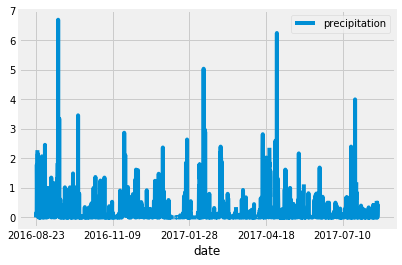

In [22]:
# Use Pandas Plotting with Matplotlib to plot the data
query_df.plot()
plt.show()

In [23]:
# Use Pandas to calcualte the summary statistics for the precipitation data
query_df.describe()

,precipitation
count,2021.000000
mean,0.177279
std,0.461190
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


## Station Analysis

In [24]:
# Design a query to show how many stations are available in this dataset?
session.query(func.count(Station.station)).all()

[(9)]

In [25]:
# What are the most active stations? (i.e. what stations have the most rows)?
# List the stations and the counts in descending order.
most_active = session.query(Measurement.station, func.count(Measurement.station)).group_by(Measurement.station).order_by(func.count(Measurement.station).desc()).all()
most_active

[('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00513117', 2709),
 ('USC00519523', 2669),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00511918', 1979),
 ('USC00517948', 1372),
 ('USC00518838', 511)]

In [26]:
# Using the station id from the previous query, calculate the lowest temperature recorded, 
# highest temperature recorded, and average temperature most active station?
temp = session.query(func.min(Measurement.tobs), func.max(Measurement.tobs), func.avg(Measurement.tobs)).filter(Measurement.station == 'USC00519281').all()
temp

[(54.0, 85.0, 71.66378066378067)]

### Choose the station with the highest number of temperature observations.
### Query the last 12 months of temperature observation data for this station and plot the results as a histogram


In [27]:
# Gain the most recent date of the station with the hiher number of temp observations
session.query(Measurement.date).filter(Measurement.station == 'USC00519281').order_by(Measurement.date.desc()).first()

('2017-08-18')

In [29]:
# Query the last 12 months
station_1year = session.query(Measurement.date, Measurement.tobs).filter(Measurement.date > '2016-08-17').filter(Measurement.station == 'USC00519281').order_by(Measurement.date).all()

In [30]:
# Save query results as Pandas DataFrame 
station_1year_df = pd.DataFrame(station_1year, columns=['date', 'tobs'])
station_1year_df.set_index('date', inplace=True)
station_1year_df.head()

,tobs
date,
2016-08-18,80.0
2016-08-19,79.0
2016-08-20,81.0
2016-08-21,79.0
2016-08-22,78.0


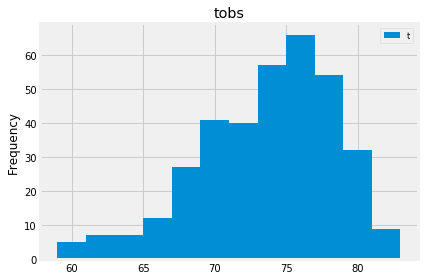

In [32]:
# Create histogram with new DataFrame
station_1year_df.hist(bins=12)
plt.ylabel('Frequency')
plt.legend('tobs', fontsize="small")
plt.tight_layout()
plt.show()